In [1]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import gensim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


# Load data from Excel file
file_path = '/kaggle/input/16000-ve-nurgreedy/allVulnerable8000_nonVulnerable8000.xls'
# test_path = '/kaggle/input/1915test/Opcode.xlsx'
#file_path = '/kaggle/input/3480-data/Data-3480.xlsx'
df_all = pd.read_excel(file_path, sheet_name='Data')
# df_test = pd.read_excel(test_path, sheet_name='Opcode-Result')
df_all.describe


2025-03-10 13:59:16.109105: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-10 13:59:16.109231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-10 13:59:16.377744: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<bound method NDFrame.describe of                                           ADDRESS  \
0      0xc150b5f72521f7501c828aad26c9a608ead350f3   
1      0x3e72c21f50170a76149dce9b8ba1eccbd5973ac7   
2      0x6e852ba3cbc51d6fdf83af554e1d2e633be3f3c1   
3      0x78530704aa62a96f6e2f20fb4621ea740fb18dcc   
4      0x4574ff7d8e558ae89ce179abfac16f44eca1d493   
...                                           ...   
16450  0x444663d6ade5e3b5075c40c6f7df28cd5346d39a   
16451  0xbf1e11eb3e6adc94177d964988bbefdb0d8b4877   
16452  0xe5fe29444c6691653bbf405f59be6ccbd62ac6b1   
16453  0x7e044a4145f046e07ac7c1f5394e2c1ee7fefb5b   
16454  0x1472bd40e9029471177eb680866ee6bf568741fc   

                                                  OPCODE CATEGORY  
0      60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...  0 1 0 0  
1      60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6...  0 0 0 1  
2      60 60 52 36 15 61 57 63 7c 60 35 04 16 63 81 1...  0 0 1 0  
3      60 60 52 36 15 61 57 60 35 7c 90 04 63 16 80 6... 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


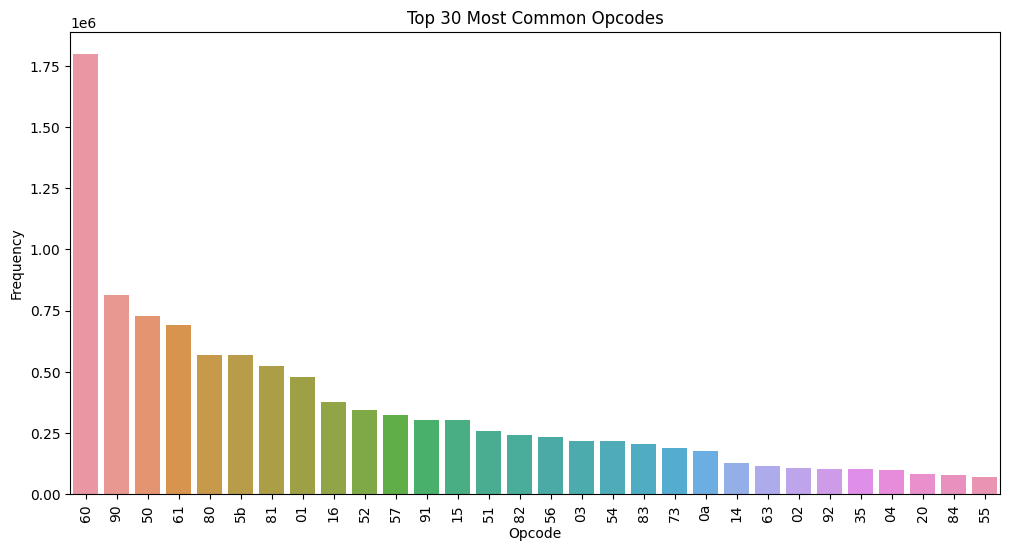

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


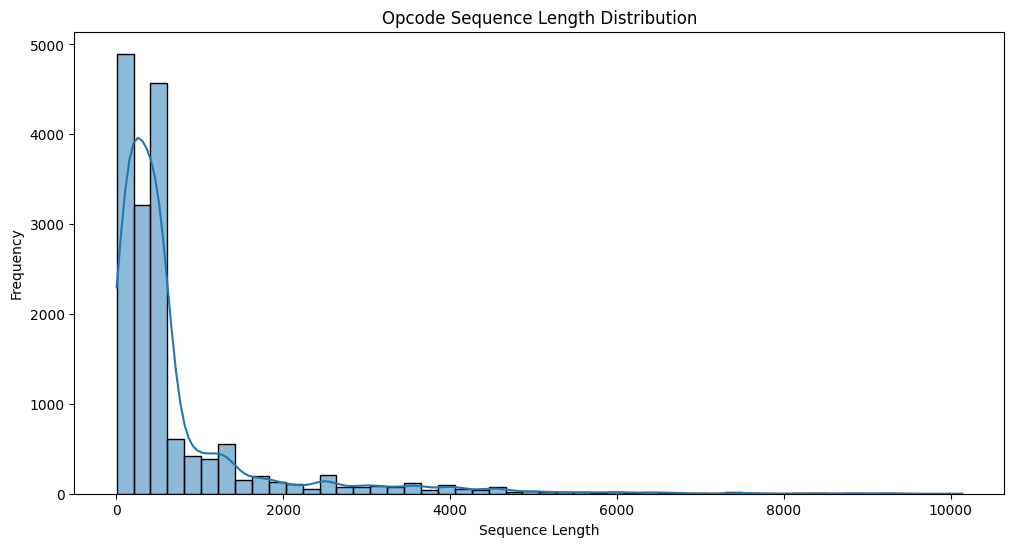

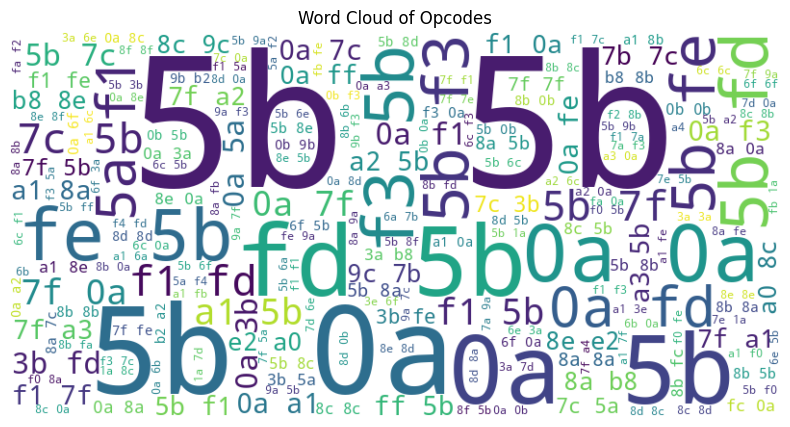

In [3]:
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# ========================= 1. OPCODE FREQUENCY DISTRIBUTION =========================
def plot_opcode_frequency(df):
    """Plots the distribution of opcode frequencies in the dataset."""
    opcode_list = [opcode for seq in df["OPCODE"].values for opcode in seq.split()]
    opcode_counts = Counter(opcode_list)

    plt.figure(figsize=(12,6))
    sns.barplot(x=[x[0] for x in opcode_counts.most_common(30)], y=[x[1] for x in opcode_counts.most_common(30)])
    plt.xticks(rotation=90)
    plt.title("Top 30 Most Common Opcodes")
    plt.xlabel("Opcode")
    plt.ylabel("Frequency")
    plt.show()

# ========================= 2. OPCODE SEQUENCE LENGTH DISTRIBUTION =========================
def plot_sequence_length_distribution(df):
    """Plots the distribution of opcode sequence lengths."""
    sequence_lengths = [len(seq.split()) for seq in df["OPCODE"].values]

    plt.figure(figsize=(12,6))
    sns.histplot(sequence_lengths, bins=50, kde=True)
    plt.title("Opcode Sequence Length Distribution")
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.show()



# ========================= 3. WORD CLOUD OF OPCODES =========================
def generate_wordcloud(df):
    """Generates a word cloud to visualize opcode distribution."""
    opcode_text = " ".join(df["OPCODE"].values)

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(opcode_text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Opcodes")
    plt.show()

file_path = '/kaggle/input/16000-ve-nurgreedy/allVulnerable8000_nonVulnerable8000.xls'
#file_path = '/kaggle/input/1915test/Opcode.xlsx'
#file_path = "/kaggle/input/sc-dataset/modified_file.xlsx"
#file_path = '/kaggle/input/3480-data/Data-3480.xlsx'
df_all = pd.read_excel(file_path, sheet_name='Data')

plot_opcode_frequency(df_all)
plot_sequence_length_distribution(df_all)
generate_wordcloud(df_all)

PUSH1: 1799355 occurrences
SWAP1: 815285 occurrences
POP: 726946 occurrences
PUSH2: 691912 occurrences
DUP1: 567623 occurrences
JUMPDEST: 567484 occurrences
DUP2: 521500 occurrences
ADD: 476929 occurrences
AND: 375688 occurrences
MSTORE: 344742 occurrences
JUMPI: 324441 occurrences
SWAP2: 303572 occurrences
ISZERO: 302397 occurrences
MLOAD: 258662 occurrences
DUP3: 241790 occurrences
JUMP: 232542 occurrences
SUB: 217808 occurrences
SLOAD: 215550 occurrences
DUP4: 204429 occurrences
PUSH20: 187240 occurrences
EXP: 173790 occurrences
EQ: 128516 occurrences
PUSH4: 112575 occurrences
MUL: 105522 occurrences
SWAP3: 102551 occurrences
CALLDATALOAD: 101462 occurrences
DIV: 98965 occurrences
SHA3: 83468 occurrences
DUP5: 77309 occurrences
SSTORE: 69231 occurrences
REVERT: 64752 occurrences
STOP: 59254 occurrences
NOT: 53957 occurrences
CALLER: 51483 occurrences
LT: 50475 occurrences
DUP6: 49965 occurrences
CALLVALUE: 49854 occurrences
SWAP4: 44480 occurrences
DUP8: 35539 occurrences
OR: 34296 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


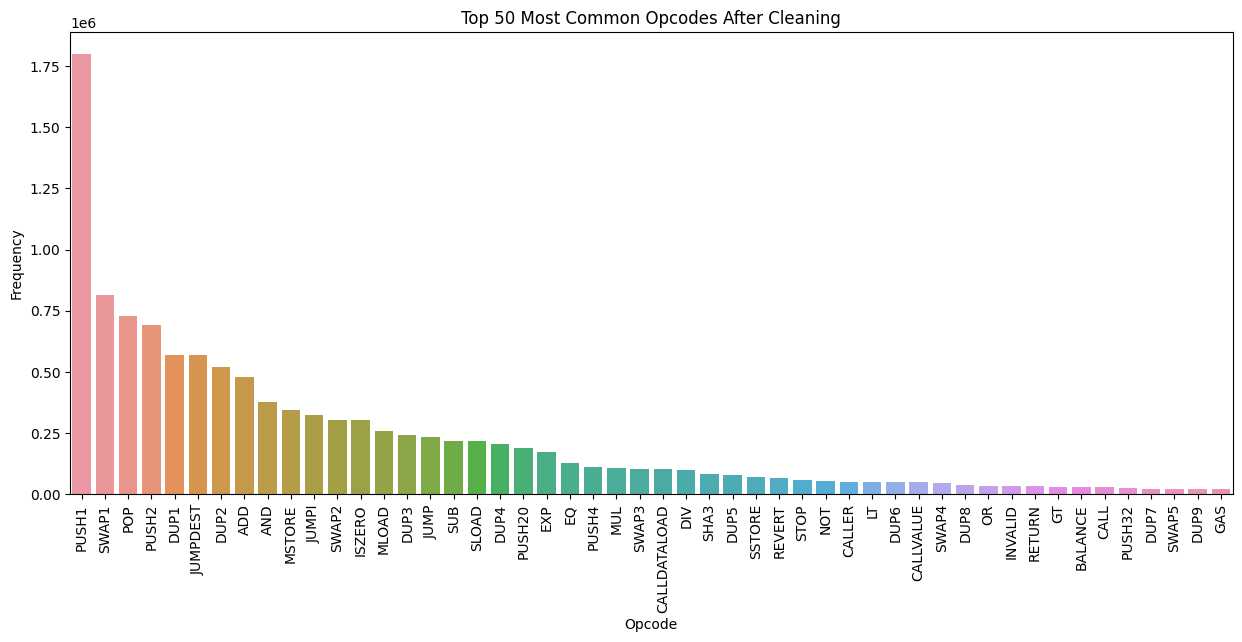

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


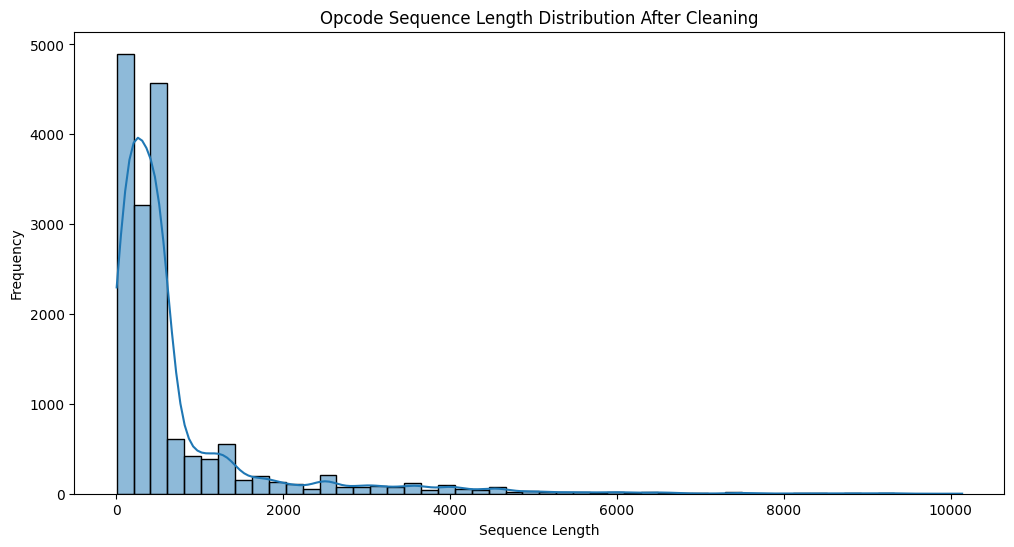

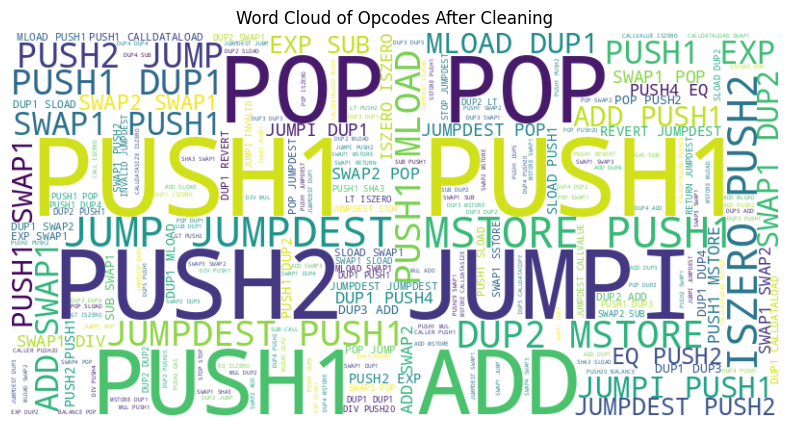

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# ========================= 1. CONVERT HEX OPCODES TO MNEMONICS =========================
ETH_OPCODE_MAP = {
    "00": "STOP",
    "01": "ADD", "02": "MUL", "03": "SUB", "04": "DIV", "05": "SDIV", "06": "MOD", "07": "SMOD",
    "08": "ADDMOD", "09": "MULMOD", "0A": "EXP", "0B": "SIGNEXTEND",
    "10": "LT", "11": "GT", "12": "SLT", "13": "SGT",
    "14": "EQ", "15": "ISZERO", "16": "AND", "17": "OR", "18": "XOR", "19": "NOT", "1A": "BYTE",
    "20": "SHA3",
    "30": "ADDRESS", "31": "BALANCE", "32": "ORIGIN", "33": "CALLER", "34": "CALLVALUE", 
    "35": "CALLDATALOAD", "36": "CALLDATASIZE", "37": "CALLDATACOPY", 
    "38": "CODESIZE", "39": "CODECOPY", "3A": "GASPRICE", "3B": "EXTCODESIZE",
    "3C": "EXTCODECOPY", "3D": "RETURNDATASIZE", "3E": "RETURNDATACOPY", "3F": "EXTCODEHASH",
    "40": "BLOCKHASH", "41": "COINBASE", "42": "TIMESTAMP", "43": "NUMBER", "44": "DIFFICULTY",
    "45": "GASLIMIT",
    "50": "POP", "51": "MLOAD", "52": "MSTORE", "53": "MSTORE8", "54": "SLOAD", "55": "SSTORE",
    "56": "JUMP", "57": "JUMPI", "58": "PC", "59": "MSIZE", "5A": "GAS", "5B": "JUMPDEST",
    "60": "PUSH1", "61": "PUSH2", "62": "PUSH3", "63": "PUSH4", "64": "PUSH5", "65": "PUSH6",
    "66": "PUSH7", "67": "PUSH8", "68": "PUSH9", "69": "PUSH10", "6A": "PUSH11", "6B": "PUSH12",
    "6C": "PUSH13", "6D": "PUSH14", "6E": "PUSH15", "6F": "PUSH16",
    "70": "PUSH17", "71": "PUSH18", "72": "PUSH19", "73": "PUSH20", "74": "PUSH21", "75": "PUSH22",
    "76": "PUSH23", "77": "PUSH24", "78": "PUSH25", "79": "PUSH26", "7A": "PUSH27", "7B": "PUSH28",
    "7C": "PUSH29", "7D": "PUSH30", "7E": "PUSH31", "7F": "PUSH32",
    "80": "DUP1", "81": "DUP2", "82": "DUP3", "83": "DUP4", "84": "DUP5", "85": "DUP6",
    "86": "DUP7", "87": "DUP8", "88": "DUP9", "89": "DUP10", "8A": "DUP11", "8B": "DUP12",
    "8C": "DUP13", "8D": "DUP14", "8E": "DUP15", "8F": "DUP16",
    "90": "SWAP1", "91": "SWAP2", "92": "SWAP3", "93": "SWAP4", "94": "SWAP5", "95": "SWAP6",
    "96": "SWAP7", "97": "SWAP8", "98": "SWAP9", "99": "SWAP10", "9A": "SWAP11", "9B": "SWAP12",
    "9C": "SWAP13", "9D": "SWAP14", "9E": "SWAP15", "9F": "SWAP16",
    "A0": "LOG0", "A1": "LOG1", "A2": "LOG2", "A3": "LOG3", "A4": "LOG4",
    "B0": "SHL", "B1": "SHR", "B2": "SAR",
    "F0": "CREATE", "F1": "CALL", "F2": "CALLCODE", "F3": "RETURN", "F4": "DELEGATECALL",
    "F5": "CREATE2", "FA": "STATICCALL", "FD": "REVERT", "FE": "INVALID", "FF": "SELFDESTRUCT"
}

def convert_hex_to_mnemonic(opcode_seq):
    """Convert a space-separated hex opcode sequence into mnemonic names."""
    return " ".join([ETH_OPCODE_MAP.get(op.upper(), "UNKNOWN") for op in opcode_seq.split()])

def clean_opcode_sequences(df):
    """Converts hex to mnemonics and removes UNKNOWN opcodes."""
    df["MNEMONIC_OPCODE"] = df["OPCODE"].apply(convert_hex_to_mnemonic)
    
    # Remove sequences with too many UNKNOWNs (suggesting noise)
    df["UNKNOWN_COUNT"] = df["MNEMONIC_OPCODE"].apply(lambda x: x.split().count("UNKNOWN"))
    df = df[df["UNKNOWN_COUNT"] < len(df["MNEMONIC_OPCODE"].str.split()) * 0.2]  # Keep only if <20% UNKNOWNs
    
    return df.drop(columns=["UNKNOWN_COUNT"])

# ========================= 2. ANALYZE OPCODES =========================
def plot_opcode_frequency(df):
    """Plots the distribution of opcode frequencies after conversion and prints the exact numbers."""
    opcode_list = [opcode for seq in df["MNEMONIC_OPCODE"].values for opcode in seq.split()]
    opcode_counts = Counter(opcode_list)
    
    # Print exact count for each opcode
    sorted_counts = opcode_counts.most_common(50)  # Top 50
    for opcode, count in sorted_counts:
        print(f"{opcode}: {count} occurrences")

    # Plot top 50
    plt.figure(figsize=(15, 6))
    sns.barplot(x=[x[0] for x in sorted_counts], y=[x[1] for x in sorted_counts])
    plt.xticks(rotation=90)
    plt.title("Top 50 Most Common Opcodes After Cleaning")
    plt.xlabel("Opcode")
    plt.ylabel("Frequency")
    plt.show()

def plot_sequence_length_distribution(df):
    """Plots opcode sequence lengths after cleaning."""
    sequence_lengths = [len(seq.split()) for seq in df["MNEMONIC_OPCODE"].values]

    plt.figure(figsize=(12,6))
    sns.histplot(sequence_lengths, bins=50, kde=True)
    plt.title("Opcode Sequence Length Distribution After Cleaning")
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.show()

def generate_wordcloud(df):
    """Generates a word cloud for opcode frequency after cleaning."""
    opcode_text = " ".join(df["MNEMONIC_OPCODE"].values)

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(opcode_text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Opcodes After Cleaning")
    plt.show()


# ========================= 3. UNIQUE OPCODES ANALYSIS =========================
def analyze_unique_opcodes(df):
    """Prints unique opcode count and compares against known Ethereum opcodes."""
    opcode_list = [opcode for seq in df["OPCODE"].values for opcode in seq.split()]
    unique_opcodes = set(opcode_list)

    known_opcodes = {
    "PUSH1", "PUSH2", "PUSH32", "CALL", "SLOAD", "SSTORE", "ADD", "SUB", "MUL", "DIV", "MOD", "LT", "GT", "EQ",
    "JUMP", "JUMPI", "STOP", "REVERT", "SELFDESTRUCT", "CALLCODE", "STATICCALL", "DELEGATECALL", "BALANCE",
    "BLOCKHASH", "TIMESTAMP", "ORIGIN", "ADDRESS", "NUMBER", "CHAINID", "GAS", "LOG0", "LOG1", "LOG2", "LOG3",
    "LOG4", "RETURN", "CREATE", "EXTCODESIZE", "EXTCODEHASH", "SDIV", "SMOD", "ADDMOD", "MULMOD", "EXP", "SIGNEXTEND", "SLT", "SGT",
    "ISZERO", "AND", "OR", "XOR", "NOT", "BYTE", "SHA3", "CALLER", "CALLVALUE",
    "CALLDATALOAD", "CALLDATASIZE", "CALLDATACOPY", "CODESIZE", "CODECOPY", "GASPRICE",
    "EXTCODECOPY", "RETURNDATASIZE", "RETURNDATACOPY", "COINBASE", "DIFFICULTY",
    "GASLIMIT", "POP", "MLOAD", "MSTORE", "MSTORE8", "PC", "MSIZE", "JUMPDEST",
    "PUSH3", "PUSH4", "PUSH5", "PUSH6", "PUSH7", "PUSH8", "PUSH9", "PUSH10",
    "PUSH11", "PUSH12", "PUSH13", "PUSH14", "PUSH15", "PUSH16", "PUSH17",
    "PUSH18", "PUSH19", "PUSH20", "PUSH21", "PUSH22", "PUSH23", "PUSH24",
    "PUSH25", "PUSH26", "PUSH27", "PUSH28", "PUSH29", "PUSH30", "PUSH31",
    "DUP1", "DUP2", "DUP3", "DUP4", "DUP5", "DUP6", "DUP7", "DUP8", "DUP9",
    "DUP10", "DUP11", "DUP12", "DUP13", "DUP14", "DUP15", "DUP16",
    "SWAP1", "SWAP2", "SWAP3", "SWAP4", "SWAP5", "SWAP6", "SWAP7", "SWAP8",
    "SWAP9", "SWAP10", "SWAP11", "SWAP12", "SWAP13", "SWAP14", "SWAP15",
    "SWAP16", "SHL", "SHR", "SAR", "CREATE2", "INVALID"
}

    missing_opcodes = known_opcodes - unique_opcodes
    extra_opcodes = unique_opcodes - known_opcodes

    print(f"Total Unique Opcodes in Dataset: {len(unique_opcodes)}")
    print(f"Known Ethereum Opcodes Missing in Dataset: {missing_opcodes}")
    print(f"Extra Opcodes (Potential Anomalies): {extra_opcodes}")

# ========================= 4. EXECUTE CLEANING & ANALYSIS =========================
df_cleaned = clean_opcode_sequences(df_all)

# Save cleaned dataset
df_cleaned.to_csv("cleaned_opcode_dataset.csv", index=False)

# Run EDA again after cleaning
plot_opcode_frequency(df_cleaned)  # Displays top 50 & prints counts
plot_sequence_length_distribution(df_cleaned)
generate_wordcloud(df_cleaned)


In [5]:
df_cleaned['OPCODE'] = df_cleaned['OPCODE'].apply(lambda x: x.split() if isinstance(x, str) else x)

all_opcodes = [opcode for sequence in df_cleaned['OPCODE'] for opcode in (sequence if isinstance(sequence, list) else [])]
unique_opcodes = len(set(all_opcodes))

print(f"Total Unique Opcodes: {unique_opcodes}")




Total Unique Opcodes: 150


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import gensim
from torch.utils.data import Dataset, DataLoader

config = {
    "num_words": 150,
    "max_length": 2048,
    "embedding_dim": 128,  # Increased embedding dimension
    "batch_size": 32,  # Increased batch size
    "epochs": 20,  # Increased number of epochs
    "learning_rate": 0.0005,  # Reduced learning rate
    "hidden_dim": 256,
    "output_dim": 2, # Binary classification?
    "dropout": 0.2,  # Increased dropout rate
    "optimizer": "Adam"  # Changed optimizer to Adam
}
"""def dftoXYtest(df, tokenizer, max_len=2048):
    sequences = tokenizer.texts_to_sequences(df['OPCODE'].values)
    X = pad_sequences(sequences, maxlen=max_len)
    labels_test(df)
    y = df['LABEL'].values
    return X, y"""

"""def labels_test(df):
    category_map = {
        '1 0 0 0': 0,   # Non_Vulnerable
        '0 1 0 0': 1,   # Suicidal
        '0 0 1 0': 2,   # Prodigal
        '0 0 0 1': 3    # Greedy
    }
    df['LABEL'] = df['Result'].map(category_map)
    # Convert labels 3 to 1 for binary classification
    df['LABEL'] = df['LABEL'].apply(lambda x: 0 if x == 0 else 1 if x == 3 else None)
    df = df.dropna(subset=['LABEL'])  # Drop rows with labels that are not 0 or 3
    df['LABEL'] = df['LABEL'].astype(int)"""





# ===================== 1. LABEL MAPPING FUNCTION =====================
def labels(df):
    """Maps CATEGORY column to numerical labels and filters only non-vulnerable (0) and greedy (1)."""
    category_map = {
        '1 0 0 0': 0,   # Non_Vulnerable
        '0 1 0 0': 1,   # Suicidal (ignored)
        '0 0 1 0': 2,   # Prodigal (ignored)
        '0 0 0 1': 3    # Greedy
    }
    df['LABEL'] = df['CATEGORY'].map(category_map)
    df['LABEL'] = df['LABEL'].apply(lambda x: 0 if x == 0 else 1 if x == 3 else None)
    df.dropna(subset=['LABEL'], inplace=True)  # Drop non-0/3 categories
    df['LABEL'] = df['LABEL'].astype(int)

# ===================== 2. TOKENIZATION & PADDING FUNCTION =====================
def tokenize_and_pad(df, config):
    """
    Tokenizes and pads opcode sequences using a tokenizer.
    Args:
        df: Pandas DataFrame containing OPCODE column.
        config: Configuration dictionary with num_words and max_length.

    Returns:
        X (padded sequences), tokenizer (for later use).
    """
    tokenizer = Tokenizer(num_words=config["num_words"], lower=False)
    tokenizer.fit_on_texts(df['OPCODE'].values)  # Learn unique opcodes
    sequences = tokenizer.texts_to_sequences(df['OPCODE'].values)  # Convert text to sequence
    X = pad_sequences(sequences, maxlen=config["max_length"])  # Pad sequences
    return X, tokenizer

# ===================== 3. CONVERT DATAFRAME TO X, Y FUNCTION =====================
def dftoXY(df, tokenizer, config):
    """
    Converts dataframe to tokenized X (input) and numerical labels y (output).
    Args:
        df: Pandas DataFrame containing OPCODE and CATEGORY.
        tokenizer: Pre-trained tokenizer.
        config: Configuration dictionary with max_length.

    Returns:
        X (padded token sequences), y (labels).
    """
    sequences = tokenizer.texts_to_sequences(df['OPCODE'].values)  # Convert opcodes to sequences
    X = pad_sequences(sequences, maxlen=config["max_length"])  # Pad sequences
    labels(df)  # Apply category mapping
    y = df['LABEL'].values  # Extract labels
    return X, y


labels(df_all)
# ===================== 5. PROCESS DATA =====================
X_train_full, tokenizer = tokenize_and_pad(df_all, config)  # Fit tokenizer & tokenize training data
X_train, y_train = dftoXY(df_all, tokenizer, config)  # Convert dataframe to X, y

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42, stratify=y_train)
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42, stratify=y_train)

# Preprocess the data using the same tokenizer
# X_test, y_test = dftoXYtest(df_test, tokenizer, max_len=2048)

# Split the training data into training and validation sets
# X_train_G, X_val_G, y_train_G, y_val_G = train_test_split(X_train_G, y_train_G, test_size=0.20, random_state=42, stratify=y_train_G)

# Print label distribution for verification
print("Training label distribution:", pd.value_counts(y_train))
print("Validation label distribution:", pd.value_counts(y_val))
#print("Test label distribution:", pd.value_counts(y_test))
# print("Gs label distribution:", pd.value_counts(y_train_G))

Training label distribution: 0    6805
1    4914
Name: count, dtype: int64
Validation label distribution: 0    1201
1     868
Name: count, dtype: int64


/tmp/ipykernel_24/3807878208.py:110: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print("Training label distribution:", pd.value_counts(y_train))
/tmp/ipykernel_24/3807878208.py:111: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print("Validation label distribution:", pd.value_counts(y_val))


In [7]:
config = {
    "num_words": 150,
    "max_length": 2048,
    "embedding_dim": 128,  # Increased embedding dimension
    "batch_size": 4,  # Increased batch size
    "epochs": 50,  # Increased number of epochs
    "learning_rate": 0.0005,  # Reduced learning rate
    "hidden_dim": 256,
    "output_dim": 2, # Binary classification?
    "dropout": 0.2,  # Increased dropout rate
    "optimizer": "Adam"  # Changed optimizer to Adam
}

In [8]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X_item = torch.tensor(self.X[idx], dtype=torch.long)
        y_item = torch.tensor(self.y[idx], dtype=torch.long)
        return X_item, y_item

# Create DataLoader for training, validation, and test sets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
#test_dataset = CustomDataset(X_test, y_test)

# gst_dataset = CustomDataset(X_train_G, y_train_G)
# gsv_dataset = CustomDataset(X_val_G, y_val_G)


train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)
#test_loader = DataLoader(test_dataset, batch_size=config["batch_size"], shuffle=False)

# gst_loader = DataLoader(gst_dataset, batch_size=config["batch_size"], shuffle=True)
# gsv_loader = DataLoader(gsv_dataset, batch_size=config["batch_size"], shuffle=False)

In [9]:
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class LSTMModel(nn.Module):
    def __init__(self, num_words, embedding_dim, hidden_dim, output_dim, dropout):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(num_words, embedding_dim)
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, dropout=dropout if dropout < 1 else 0)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x, (h_n, c_n) = self.lstm(x)
        x = self.fc(h_n[-1])
        return x

In [10]:
import os
import gc
from collections import defaultdict
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report, f1_score


def train_model(model, criterion, optimizer, device, epochs, train_loader, val_loader, config_id, patience=5):
    
    # Track history
    history = defaultdict(list)

    # Directories for saving model weights and training history
    weights_directory = 'weights'
    history_directory = 'history'
    os.makedirs(weights_directory, exist_ok=True)
    os.makedirs(history_directory, exist_ok=True)

    best_val_loss = float('inf')
    patience_counter = 0
    best_model_path = None

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        total = 0
        
        with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch") as train_loader_tqdm:
            for X_batch, y_batch in train_loader_tqdm:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                train_correct += (predicted == y_batch).sum().item()

        train_accuracy = 100 * train_correct / total
        history['train_loss'].append(train_loss / len(train_loader))
        history['train_accuracy'].append(train_accuracy)

        # Validation
        model.eval()
        val_loss = 0
        val_correct = 0
        total = 0
        
        true_labels = []
        predictions = []

        with torch.no_grad():
            with tqdm(val_loader, desc=f"Validation - Epoch {epoch+1}/{epochs}", unit="batch") as val_loader_tqdm:
                for X_batch, y_batch in val_loader_tqdm:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
    
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    
                    predictions.extend(predicted.view(-1).cpu().numpy())
                    true_labels.extend(y_batch.view(-1).cpu().numpy())
                    
                    total += y_batch.size(0)
                    val_correct += (predicted == y_batch).sum().item()
    
        val_accuracy = 100 * val_correct / total
        history['val_loss'].append(val_loss / len(val_loader))
        history['val_accuracy'].append(val_accuracy)

        # Save model if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_path = os.path.join(weights_directory, f'{config_id}_best_model_epoch_{epoch+1}.pth')
            torch.save(model.state_dict(), best_model_path)
            print(f"✅ New best model saved: {best_model_path}")
        else:
            patience_counter += 1
            print(f"⚠️ No improvement. Patience count: {patience_counter}/{patience}")

        # Print epoch summary
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss / len(val_loader):.4f}, Val Acc: {val_accuracy:.2f}%')

        report = classification_report(true_labels, predictions, output_dict=True)
        val_f1 = f1_score(true_labels, predictions, average="macro")

        # Early stopping
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered!")
            break
        
        torch.cuda.empty_cache()
        gc.collect()
        
    """# Save training history
    history_path = os.path.join(history_directory, 'training_history.txt')
    with open(history_path, 'w') as file:
        file.write(str(dict(history)))"""

    return history, report, val_f1, best_model_path

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader, device):
    model.eval()
    true_labels = []
    predictions = []
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            
            predictions.extend(predicted.view(-1).cpu().numpy())
            true_labels.extend(y_batch.view(-1).cpu().numpy())

    print("Classification Report:\n", classification_report(true_labels, predictions))
    
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
# model.load_state_dict(torch.load("/kaggle/working/weights/model_epoch_33.pth"))
# evaluate_model(model, test_loader, device)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

def sliding_window(tensor, window_size, step_size):
    windows = []
    for start in range(0, tensor.size(1) - window_size + 1, step_size):
        end = start + window_size
        windows.append(tensor[:, start:end])
    return torch.stack(windows, dim=0)

class AttentionPooling(nn.Module):
    def __init__(self, input_dim):
        super(AttentionPooling, self).__init__()
        self.query = nn.Parameter(torch.randn(input_dim))
    
    def forward(self, x):
        batch_size, features, seq_len = x.shape
        x = x.transpose(1, 2)
        query = self.query.unsqueeze(0).unsqueeze(-1).expand(batch_size, -1, -1)
        scores = torch.bmm(x, query).squeeze(-1)
        weights = F.softmax(scores, dim=-1).unsqueeze(1)
        weighted_sum = torch.bmm(weights, x).squeeze(1)
        return weighted_sum

class TransformerEncoder(nn.Module):
    def __init__(self, embed_size, num_heads, ff_dim, dropout):
        super(TransformerEncoder, self).__init__()
        self.norm1 = nn.LayerNorm(embed_size)
        self.attn = nn.MultiheadAttention(embed_dim=embed_size, num_heads=num_heads, dropout=dropout)
        self.norm2 = nn.LayerNorm(embed_size)
        self.ffn = nn.Sequential(
            nn.Conv1d(embed_size, ff_dim, kernel_size=1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Conv1d(ff_dim, embed_size, kernel_size=1)
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        src = src.permute(1, 0, 2)
        src = self.norm1(src)
        attn_output, _ = self.attn(src, src, src)
        src = src + self.dropout(attn_output)
        src = src.permute(1, 0, 2)
        src2 = self.norm2(src)
        src = src + self.ffn(src2.permute(0, 2, 1)).permute(0, 2, 1)
        return src

class TransformerModelWithWindow(nn.Module):
    def __init__(self, config):
        super(TransformerModelWithWindow, self).__init__()
        self.config = config
        self.embedding = nn.Embedding(num_embeddings=config["num_words"], embedding_dim=config["embedding_dim"])
        self.encoder = TransformerEncoder(embed_size=config["embedding_dim"], num_heads=config["num_heads"], ff_dim=config["ff_dim"], dropout=config["dropout"])
        self.attention_pooling = AttentionPooling(input_dim=config["embedding_dim"])
        self.out = nn.Linear(config["embedding_dim"], 2)
        self.dropout = nn.Dropout(config["dropout"])

    def forward(self, x):
        batch_size, seq_len = x.shape
        if seq_len > self.config["max_length"]:
            step_size = int(self.config["max_length"] * self.config["sliding_window_ratio"])
            window_size = self.config["max_length"]
            x_windows = sliding_window(x, window_size, step_size)
            pooled_output = torch.tensor([], device=x.device)
            for i in range(x_windows.size(0)):
                window = x_windows[i]
                window = self.embedding(window)
                window = self.encoder(window)
                window = window.permute(0, 2, 1)
                window = self.attention_pooling(window)
                pooled_output = torch.cat((pooled_output, window.unsqueeze(0)), dim=0)
            x = pooled_output.mean(dim=0)
        else:
            x = self.embedding(x)
            x = self.encoder(x)
            x = x.permute(0, 2, 1)
            x = self.attention_pooling(x)
        x = self.dropout(x)
        x = self.out(x)
        return x


In [13]:
import itertools
import time
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import psutil
import gc
from tqdm import tqdm

# Function to track GPU and CPU memory usage
def track_resources():
    """ Returns current CPU usage, RAM usage, and GPU memory usage. """
    cpu_usage = psutil.cpu_percent(interval=1)  # CPU usage in percentage
    ram_usage = psutil.virtual_memory().used / (1024 ** 3)  # RAM usage in GB
    gpu_memory = torch.cuda.memory_allocated() / (1024 ** 3) if torch.cuda.is_available() else 0  # GPU usage in GB
    return cpu_usage, ram_usage, gpu_memory

# Define hyperparameter tuning function
def hyperparameter_search(param_grid, train_loader, val_loader, device, model_type):
    results = []
    best_f1 = 0
    best_params = None
    config_counter = 0


    for params in itertools.product(*param_grid.values()):
        config_id = f"config_{config_counter}"
        config_counter += 1
        
        param_dict = dict(zip(param_grid.keys(), params))
        print(f"\n🔍 Testing Hyperparameters: {param_dict} with id {config_id}")

        # Clone base_config and update it with new parameters
        config = base_config.copy()
        config.update(param_dict)  # Dynamically apply new hyperparameters

        # Ensure head_size follows standard convention
        if model_type == "transformer":
            config["head_size"] = config["embedding_dim"] // config["num_heads"]

        # Initialize model
        if model_type == "transformer":
            model = TransformerModelWithWindow(config).to(device)
        elif model_type == "lstm":
            model = LSTMModel(config["num_words"], config["embedding_dim"], config["hidden_dim"], config["output_dim"], config["dropout"]).to(device)
        else:
            raise ValueError("Invalid model_type. Choose 'transformer' or 'lstm'.")

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.AdamW(model.parameters(), lr=0.0005)

        # Track start time and system resources
        start_time = time.time()
        start_cpu, start_ram, start_gpu = track_resources()

        # Train and evaluate model
        history, report, val_f1, best_model_path = train_model(
            model, criterion, optimizer, device, epochs, train_loader, val_loader, config_id=config_id
        )

        # Track end time and system resources
        end_time = time.time()
        end_cpu, end_ram, end_gpu = track_resources()

        # Compute resource usage
        cpu_diff = end_cpu - start_cpu
        ram_diff = end_ram - start_ram
        gpu_diff = end_gpu - start_gpu
        total_time = end_time - start_time
        
        # Store results
        results.append({
            'config_id': config_id,
            'config': config,
            'train_loss': history['train_loss'][-1],
            'val_loss': history['val_loss'][-1],
            'accuracy': report['accuracy'],
            'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall'],
            'f1_score': val_f1,
            'saved_weights': best_model_path,
            'time_taken (s)': total_time,
            'CPU (%)': cpu_diff,
            'RAM (GB)': ram_diff,
            'GPU (GB)': gpu_diff
        })

        # Save best parameters based on F1-score
        if val_f1 > best_f1:
            best_f1 = val_f1
            best_params = config
            
        # Clean up memory after each iteration
        del model
        gc.collect()
        torch.cuda.empty_cache()

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)
    print(df_results)

    # Save results to CSV
    df_results.to_csv("hyperparameter_results.csv", index=False)

    return best_params, df_results



In [14]:
base_config = {
    "num_words": 150,
    "max_length": 2048,
    "embedding_dim": 256,
    "batch_size": 4,
    "epochs": 50,
    "learning_rate": 0.0005,
    "head_size": 256/8,
    "num_heads": 8,
    "ff_dim": 4*256,
    "dropout": 0.2,
    "optimizer": "Adam"
}

# Define hyperparameter search space
transformer_param_grid = {
    'embedding_dim': [256, 512],
    'num_heads': [8, 16],
    'batch_size': [4],
    'epochs': [50],
    'ff_dim': [1024],
    #'dropout': [0.1, 0.2],
    #'learning_rate': [0.0005, 0.001],
    'sliding_window_ratio': [0.75]
}

lstm_param_grid = {
    'output_dim' : [2],
    'embedding_dim': [128, 256],
    'hidden_dim': [128, 256, 512],
    'learning_rate' : [0.0005]
}


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

"""# Initialize the model
model = TransformerModelWithWindow(config)
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    model = torch.nn.DataParallel(model)
# model.load_state_dict(torch.load("/kaggle/input/vascottransff/pytorch/20ep/1/model_epoch_20_VASCOT.pth"))
model.to(device)"""

epochs = config['epochs']

#best_params_lstm, df_results = hyperparameter_search(lstm_param_grid, train_loader, val_loader, device, model_type="lstm")
best_params_transformer, df_results = hyperparameter_search(transformer_param_grid, train_loader, val_loader, device, model_type="transformer")



🔍 Testing Hyperparameters: {'embedding_dim': 256, 'num_heads': 8, 'batch_size': 4, 'epochs': 50, 'ff_dim': 1024, 'sliding_window_ratio': 0.75} with id config_0


Validation - Epoch 1/50: 100%|██████████| 518/518 [00:11<00:00, 44.41batch/s]


✅ New best model saved: weights/config_0_best_model_epoch_1.pth
Epoch 1/50, Train Loss: 0.3470, Train Acc: 87.26%, Val Loss: 0.4605, Val Acc: 55.92%


Validation - Epoch 2/50: 100%|██████████| 518/518 [00:11<00:00, 44.97batch/s]


⚠️ No improvement. Patience count: 1/5
Epoch 2/50, Train Loss: 0.2758, Train Acc: 90.59%, Val Loss: 0.7052, Val Acc: 56.31%


Validation - Epoch 3/50: 100%|██████████| 518/518 [00:11<00:00, 45.04batch/s]


✅ New best model saved: weights/config_0_best_model_epoch_3.pth
Epoch 3/50, Train Loss: 0.3095, Train Acc: 89.69%, Val Loss: 0.3977, Val Acc: 77.09%


Validation - Epoch 4/50: 100%|██████████| 518/518 [00:11<00:00, 44.85batch/s]


⚠️ No improvement. Patience count: 1/5
Epoch 4/50, Train Loss: 0.4338, Train Acc: 83.84%, Val Loss: 0.5263, Val Acc: 75.83%


Validation - Epoch 5/50: 100%|██████████| 518/518 [00:11<00:00, 44.82batch/s]


✅ New best model saved: weights/config_0_best_model_epoch_5.pth
Epoch 5/50, Train Loss: 0.3279, Train Acc: 88.59%, Val Loss: 0.1836, Val Acc: 93.43%


Validation - Epoch 6/50: 100%|██████████| 518/518 [00:11<00:00, 44.70batch/s]


⚠️ No improvement. Patience count: 1/5
Epoch 6/50, Train Loss: 0.4477, Train Acc: 87.70%, Val Loss: 0.3006, Val Acc: 92.36%


Validation - Epoch 7/50: 100%|██████████| 518/518 [00:11<00:00, 44.35batch/s]


⚠️ No improvement. Patience count: 2/5
Epoch 7/50, Train Loss: 0.3443, Train Acc: 88.86%, Val Loss: 0.3090, Val Acc: 89.37%


Validation - Epoch 8/50: 100%|██████████| 518/518 [00:11<00:00, 44.67batch/s]


⚠️ No improvement. Patience count: 3/5
Epoch 8/50, Train Loss: 0.3451, Train Acc: 90.16%, Val Loss: 2.4750, Val Acc: 56.94%


Validation - Epoch 9/50: 100%|██████████| 518/518 [00:11<00:00, 44.49batch/s]


⚠️ No improvement. Patience count: 4/5
Epoch 9/50, Train Loss: 0.4165, Train Acc: 86.15%, Val Loss: 0.4302, Val Acc: 82.02%


Validation - Epoch 10/50: 100%|██████████| 518/518 [00:11<00:00, 44.22batch/s]


⚠️ No improvement. Patience count: 5/5
Epoch 10/50, Train Loss: 0.3577, Train Acc: 89.53%, Val Loss: 0.2716, Val Acc: 89.85%
⏹️ Early stopping triggered!

🔍 Testing Hyperparameters: {'embedding_dim': 256, 'num_heads': 16, 'batch_size': 4, 'epochs': 50, 'ff_dim': 1024, 'sliding_window_ratio': 0.75} with id config_1


Validation - Epoch 1/50: 100%|██████████| 518/518 [00:19<00:00, 27.12batch/s]


✅ New best model saved: weights/config_1_best_model_epoch_1.pth
Epoch 1/50, Train Loss: 0.3200, Train Acc: 88.01%, Val Loss: 0.1398, Val Acc: 94.10%


Validation - Epoch 2/50: 100%|██████████| 518/518 [00:19<00:00, 26.96batch/s]


⚠️ No improvement. Patience count: 1/5
Epoch 2/50, Train Loss: 0.2853, Train Acc: 90.14%, Val Loss: 0.3351, Val Acc: 87.24%


Validation - Epoch 3/50: 100%|██████████| 518/518 [00:19<00:00, 26.98batch/s]


⚠️ No improvement. Patience count: 2/5
Epoch 3/50, Train Loss: 0.2679, Train Acc: 91.33%, Val Loss: 0.2203, Val Acc: 93.28%


Validation - Epoch 4/50: 100%|██████████| 518/518 [00:19<00:00, 26.84batch/s]


⚠️ No improvement. Patience count: 3/5
Epoch 4/50, Train Loss: 0.2491, Train Acc: 91.99%, Val Loss: 0.3453, Val Acc: 91.06%


Validation - Epoch 5/50: 100%|██████████| 518/518 [00:19<00:00, 26.92batch/s]


⚠️ No improvement. Patience count: 4/5
Epoch 5/50, Train Loss: 0.2950, Train Acc: 90.77%, Val Loss: 0.4961, Val Acc: 86.85%


Validation - Epoch 6/50: 100%|██████████| 518/518 [00:19<00:00, 26.89batch/s]


⚠️ No improvement. Patience count: 5/5
Epoch 6/50, Train Loss: 0.2799, Train Acc: 91.48%, Val Loss: 0.2352, Val Acc: 92.32%
⏹️ Early stopping triggered!

🔍 Testing Hyperparameters: {'embedding_dim': 512, 'num_heads': 8, 'batch_size': 4, 'epochs': 50, 'ff_dim': 1024, 'sliding_window_ratio': 0.75} with id config_2


Validation - Epoch 1/50: 100%|██████████| 518/518 [00:16<00:00, 30.71batch/s]


✅ New best model saved: weights/config_2_best_model_epoch_1.pth
Epoch 1/50, Train Loss: 0.8254, Train Acc: 65.53%, Val Loss: 0.4981, Val Acc: 83.13%


Validation - Epoch 2/50: 100%|██████████| 518/518 [00:16<00:00, 30.70batch/s]


✅ New best model saved: weights/config_2_best_model_epoch_2.pth
Epoch 2/50, Train Loss: 0.8285, Train Acc: 77.49%, Val Loss: 0.3321, Val Acc: 92.51%


Validation - Epoch 3/50: 100%|██████████| 518/518 [00:16<00:00, 30.57batch/s]


⚠️ No improvement. Patience count: 1/5
Epoch 3/50, Train Loss: 1.3636, Train Acc: 71.47%, Val Loss: 0.5851, Val Acc: 70.71%


Validation - Epoch 4/50: 100%|██████████| 518/518 [00:16<00:00, 30.54batch/s]


⚠️ No improvement. Patience count: 2/5
Epoch 4/50, Train Loss: 1.1394, Train Acc: 68.98%, Val Loss: 0.7443, Val Acc: 72.40%


Validation - Epoch 5/50: 100%|██████████| 518/518 [00:16<00:00, 30.72batch/s]


⚠️ No improvement. Patience count: 3/5
Epoch 5/50, Train Loss: 1.2649, Train Acc: 69.27%, Val Loss: 0.7582, Val Acc: 78.54%


Validation - Epoch 6/50: 100%|██████████| 518/518 [00:16<00:00, 30.73batch/s]


⚠️ No improvement. Patience count: 4/5
Epoch 6/50, Train Loss: 1.1763, Train Acc: 70.07%, Val Loss: 0.7395, Val Acc: 80.62%


Validation - Epoch 7/50: 100%|██████████| 518/518 [00:16<00:00, 30.82batch/s]


⚠️ No improvement. Patience count: 5/5
Epoch 7/50, Train Loss: 1.1840, Train Acc: 72.93%, Val Loss: 1.3194, Val Acc: 71.05%
⏹️ Early stopping triggered!

🔍 Testing Hyperparameters: {'embedding_dim': 512, 'num_heads': 16, 'batch_size': 4, 'epochs': 50, 'ff_dim': 1024, 'sliding_window_ratio': 0.75} with id config_3


Validation - Epoch 1/50: 100%|██████████| 518/518 [00:24<00:00, 21.22batch/s]


✅ New best model saved: weights/config_3_best_model_epoch_1.pth
Epoch 1/50, Train Loss: 0.4752, Train Acc: 85.87%, Val Loss: 0.6764, Val Acc: 76.51%


Validation - Epoch 2/50: 100%|██████████| 518/518 [00:24<00:00, 21.27batch/s]


✅ New best model saved: weights/config_3_best_model_epoch_2.pth
Epoch 2/50, Train Loss: 0.9415, Train Acc: 82.40%, Val Loss: 0.5025, Val Acc: 84.87%


Validation - Epoch 3/50: 100%|██████████| 518/518 [00:24<00:00, 21.11batch/s]


⚠️ No improvement. Patience count: 1/5
Epoch 3/50, Train Loss: 1.2907, Train Acc: 73.08%, Val Loss: 0.8930, Val Acc: 73.13%


Validation - Epoch 4/50: 100%|██████████| 518/518 [00:24<00:00, 21.25batch/s]


⚠️ No improvement. Patience count: 2/5
Epoch 4/50, Train Loss: 0.8465, Train Acc: 73.75%, Val Loss: 0.5379, Val Acc: 85.94%


Validation - Epoch 5/50: 100%|██████████| 518/518 [00:24<00:00, 21.17batch/s]


⚠️ No improvement. Patience count: 3/5
Epoch 5/50, Train Loss: 1.0096, Train Acc: 88.45%, Val Loss: 1.1756, Val Acc: 92.99%


Validation - Epoch 6/50: 100%|██████████| 518/518 [00:24<00:00, 21.29batch/s]


⚠️ No improvement. Patience count: 4/5
Epoch 6/50, Train Loss: 1.1062, Train Acc: 91.45%, Val Loss: 0.8467, Val Acc: 94.39%


Validation - Epoch 7/50: 100%|██████████| 518/518 [00:24<00:00, 21.26batch/s]


⚠️ No improvement. Patience count: 5/5
Epoch 7/50, Train Loss: 1.1548, Train Acc: 90.75%, Val Loss: 0.9902, Val Acc: 95.65%
⏹️ Early stopping triggered!
  config_id                                             config  train_loss  \
0  config_0  {'num_words': 150, 'max_length': 2048, 'embedd...    0.357700   
1  config_1  {'num_words': 150, 'max_length': 2048, 'embedd...    0.279943   
2  config_2  {'num_words': 150, 'max_length': 2048, 'embedd...    1.184030   
3  config_3  {'num_words': 150, 'max_length': 2048, 'embedd...    1.154821   

   val_loss  accuracy  precision    recall  f1_score  \
0  0.271585  0.898502   0.898337  0.898502  0.895351   
1  0.235190  0.923151   0.924555  0.923151  0.920042   
2  1.319360  0.710488   0.817378  0.710488  0.706539   
3  0.990250  0.956501   0.956917  0.956501  0.955508   

                             saved_weights  time_taken (s)  CPU (%)  RAM (GB)  \
0  weights/config_0_best_model_epoch_5.pth     2154.017417    -15.8  0.348785   
1  weights/co

In [15]:
# model.load_state_dict(torch.load("/kaggle/working/weights/model_epoch_19.pth"))
evaluate_model(model, test_loader, device)

NameError: name 'model' is not defined